In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from pandas_datareader import data as pdr
pd.options.display.float_format = '{:,}'.format
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
t = yf.Ticker('DIS')

In [3]:
df = pd.DataFrame.from_dict(t.info.items())
df = df.rename(columns={0: "Financials", 1: "Fundamentals"})
#np.array(df['Financials'])

In [4]:
df1 = df[df['Financials'].isin([
    'longName',
    'symbol',
    'profitMargins',
    'grossMargins',
    'operatingMargins',
     'returnOnEquity',
    'returnOnAssets',
    'priceToSalesTrailing12Months',
    'pegRatio',
    'priceToBook',
    'trailingEps',
    'trailingPE',
    'revenuePerShare',
    'totalCashPerShare',
    'earningsGrowth',
    'revenueGrowth',
     'fiftyTwoWeekHigh',
    'fiftyTwoWeekLow',
    'targetHighPrice',
     'currentPrice',
    'threeYearAverageReturn',
    'fiveYearAverageReturn',
    'fiftyDayAverage',
    'currentPrice',
    'ytdReturn'
    'currentRatio',
    'totalCash',
    'totalDebt',
    'quickRatio',
    'marketCap',
    'dividendYield',
    'enterpriseValue',
    'enterpriseToEbitda',
    'ebitda','totalCashPerShare'
    ])]

In [5]:
t.major_holders

# Balance Sheet

In [6]:
d=t.balance_sheet.reset_index()
d = d[d['index'].isin(['Total Liab','Total Assets','Total Stockholder Equity'])]
d= d.iloc[:,:2]
d.columns = ['Financials','Fundamentals']
df1 = pd.concat([df1,d]).reset_index(drop=True)

In [7]:
f=t.balance_sheet.reset_index()
f = f[f['index'].isin(['Total Liab','Total Assets','Total Stockholder Equity'])]
f = f.set_index('index')
f = f/1000000
fp = round((f.pct_change(axis=1,periods=-1)*100),2).rename(index={'Total Liab': 'Total Liab pct_chg',
                                                                 'Total Stockholder Equity': 'Total Stockholder Equity pct_chg',
                                                                 'Total Assets': 'Total Assets pct_chg'})
round(f.append(fp).sort_index().astype('float'),2)

,2021-10-02 00:00:00,2020-10-03 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00
index,,,,
Total Assets,"203,609.0","201,549.0","193,984.0","98,598.0"
Total Assets pct_chg,1.02,3.9,96.74,NaN
Total Liab,"101,385.0","104,037.0","91,132.0","44,643.0"
Total Liab pct_chg,-2.55,14.16,104.14,NaN
Total Stockholder Equity,"88,553.0","83,583.0","88,877.0","48,773.0"
Total Stockholder Equity pct_chg,5.95,-5.96,82.23,NaN


In [8]:
bs = t.get_balancesheet()/1000000

In [9]:
#quick Ration
qr=round((t.get_balancesheet().filter(items = ['Total Current Assets'], axis=0).values-t.get_balancesheet().filter(items = ['Inventory'], axis=0).values)/t.get_balancesheet().filter(items = ['Total Current Liabilities'], axis=0)*100,2)
qr = qr.rename(index={'Total Current Liabilities': 'Quick Ratio'})
bs = bs.append(qr)

# Earnings

In [10]:
e = t.earnings/1000000
e2 = round((e.pct_change(axis=0,)*100),2)
pd.merge(e,e2,left_index=True,right_index=True).rename(columns={'Revenue_y': 'Revenue %','Earnings_y': 'Earnings %','Revenue_x': 'Revenue','Earnings_x': 'Earnings'})

,Revenue,Earnings,Revenue %,Earnings %
Year,,,,
2018,"59,434.0","12,598.0",NaN,NaN
2019,"69,607.0","11,054.0",17.12,-12.26
2020,"65,388.0","-2,864.0",-6.06,-125.91
2021,"67,418.0","1,995.0",3.1,-169.66


In [11]:
eq = t.quarterly_earnings/1000000
eq2 = round((eq.pct_change(axis=0,)*100),2)
eq2 = pd.merge(eq,eq2,left_index=True,right_index=True).rename(columns={'Revenue_y': 'Revenue %','Earnings_y': 'Earnings %','Revenue_x': 'Revenue','Earnings_x': 'Earnings'})
eq2

,Revenue,Earnings,Revenue %,Earnings %
Quarter,,,,
1Q2021,"16,249.0",17.0,NaN,NaN
2Q2021,"15,613.0",901.0,-3.91,"5,200.0"
3Q2021,"17,022.0",918.0,9.02,1.89
4Q2021,"18,534.0",159.0,8.88,-82.68


# Income Statement

In [12]:
fin =t.financials/1000000
fin2= fin
fin2['avg']=fin2.sum(axis=1)/4
fin2

,2021-10-02 00:00:00,2020-10-03 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,avg
Research Development,NaN,NaN,NaN,NaN,0.0
Effect Of Accounting Charges,NaN,NaN,NaN,NaN,0.0
Income Before Tax,"2,561.0","-1,743.0","13,923.0","14,729.0","7,367.5"
Minority Interest,"13,671.0","13,929.0","13,975.0","5,182.0","11,689.25"
Net Income,"1,995.0","-2,864.0","11,054.0","12,598.0","5,695.75"
Selling General Administrative,"13,684.0","12,382.0","11,349.0","8,860.0","11,568.75"
Gross Profit,"22,287.0","21,508.0","27,546.0","26,708.0","24,512.25"
Ebit,"3,492.0","3,781.0","12,030.0","14,837.0","8,535.0"
Operating Income,"3,492.0","3,781.0","12,030.0","14,837.0","8,535.0"
Other Operating Expenses,NaN,NaN,NaN,NaN,0.0


In [13]:
round((fin2.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Gross Profit','Net Income',
                                                                                   'Total Revenue','Operating Income',
                                                                                   'Research Development'], axis=0)

,2021-10-02 00:00:00,2020-10-03 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,avg
Gross Profit,3.62,-21.92,3.14,8.96,NaN
Net Income,-169.66,-125.91,-12.26,121.18,NaN
Total Revenue,3.1,-6.06,17.12,-9.21,NaN
Operating Income,-7.64,-68.57,-18.92,73.84,NaN
Research Development,NaN,NaN,NaN,NaN,NaN


# Quarterly Income Statement

In [14]:
t.quarterly_financials/1000000

,2021-10-02,2021-07-03,2021-04-03,2021-01-02
Research Development,NaN,NaN,NaN,NaN
Effect Of Accounting Charges,NaN,NaN,NaN,NaN
Income Before Tax,290.0,995.0,"1,230.0",46.0
Minority Interest,"13,671.0","13,873.0","13,656.0","13,987.0"
Net Income,159.0,918.0,901.0,17.0
Selling General Administrative,"4,386.0","3,200.0","3,149.0","2,950.0"
Gross Profit,"6,193.0","5,789.0","5,831.0","4,474.0"
Ebit,532.0,"1,323.0","1,410.0",226.0
Operating Income,532.0,"1,323.0","1,410.0",226.0
Other Operating Expenses,NaN,NaN,NaN,NaN


In [15]:
round((t.quarterly_financials.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Gross Profit','Net Income',
                                                                                   'Total Revenue','Operating Income',
                                                                                   'Research Development'], axis=0)

,2021-10-02,2021-07-03,2021-04-03,2021-01-02
Gross Profit,6.98,-0.72,30.33,NaN
Net Income,-82.68,1.89,"5,200.0",NaN
Total Revenue,8.88,9.02,-3.91,NaN
Operating Income,-59.79,-6.17,523.89,NaN
Research Development,NaN,NaN,NaN,NaN


# Cash Flow - Yearly

In [16]:
cf = t.cashflow
cf2 = cf.filter(items = ['Total Cash From Operating Activities'], axis=0).values+cf.filter(items = ['Capital Expenditures'], axis=0)
cf2 = cf2.rename(index={'Capital Expenditures': 'Free Cash Flow'})
cf2 = cf.append(cf2)/1000000
cf3 = cf2
cf3['avg']=cf3.sum(axis=1)/4
cf3

,2021-10-02 00:00:00,2020-10-03 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,avg
Change To Liabilities,"2,410.0","-2,293.0",191.0,235.0,135.75
Total Cashflows From Investing Activities,"-3,163.0","-3,637.0","-4,118.0","-5,336.0","-4,063.5"
Net Borrowings,"-3,699.0","11,233.0","3,677.0","-2,583.0","2,157.0"
Total Cash From Financing Activities,"-4,385.0","8,480.0","-1,090.0","-8,843.0","-1,459.5"
Change To Operating Activities,171.0,-157.0,932.0,-927.0,4.75
Issuance Of Stock,435.0,305.0,318.0,210.0,317.0
Net Income,"1,995.0","-2,864.0","11,054.0","12,598.0","5,695.75"
Change In Cash,"-1,951.0","12,499.0","1,300.0",91.0,"2,984.75"
Effect Of Exchange Rate,30.0,38.0,-98.0,-25.0,-13.75
Total Cash From Operating Activities,"5,567.0","7,618.0","6,606.0","14,295.0","8,521.5"


In [17]:
round((cf3.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Free Cash Flow'], axis=0).iloc[:,:-1]

,2021-10-02 00:00:00,2020-10-03 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00
Free Cash Flow,-44.69,107.86,-82.4,129.34


# Cash Flow - Quarterly

In [18]:
cfq = t.quarterly_cashflow
cfq2 = cfq.filter(items = ['Total Cash From Operating Activities'], axis=0).values+cfq.filter(items = ['Capital Expenditures'], axis=0)
cfq2 = cfq2.rename(index={'Capital Expenditures': 'Free Cash Flow'})
cfq2 = cfq.append(cfq2)/1000000
cfq2

,2021-10-02,2021-07-03,2021-04-03,2021-01-02
Change To Liabilities,"2,069.0","1,121.0",-138.0,-642.0
Total Cashflows From Investing Activities,"-1,086.0",-754.0,-591.0,-732.0
Net Borrowings,"-1,324.0",-509.0,"-1,549.0",-317.0
Total Cash From Financing Activities,"-1,614.0",-530.0,"-1,908.0",-333.0
Change To Operating Activities,284.0,18.0,5.0,-136.0
Issuance Of Stock,30.0,11.0,185.0,209.0
Net Income,159.0,918.0,901.0,17.0
Change In Cash,-112.0,183.0,"-1,180.0",-842.0
Effect Of Exchange Rate,-47.0,7.0,-69.0,139.0
Total Cash From Operating Activities,"2,635.0","1,460.0","1,388.0",84.0


In [19]:
round((cfq2.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Free Cash Flow'], axis=0)

,2021-10-02,2021-07-03,2021-04-03,2021-01-02
Free Cash Flow,192.15,-15.53,-191.42,NaN


# Debt

In [20]:
df1 = df1.set_index('Financials')

In [21]:
dt = df1.filter(items = ['totalDebt'], axis=0).values/df1.filter(items = ['Total Stockholder Equity','Total Assets'], axis=0)
dt = dt.rename(index={'Total Stockholder Equity': 'Debt to Equity',
                     'Total Assets': 'Debt to Assets'})

In [22]:
fcfy = (cf2.iloc[:,:1].filter(items = ['Free Cash Flow'], axis=0).values*1000000/df1.filter(items = ['enterpriseValue'], axis=0))*100
fcfy = fcfy.rename(index={'enterpriseValue': 'FCF Yield-EV'})

In [23]:
fcfy2 = (cf2.iloc[:,:1].filter(items = ['Free Cash Flow'], axis=0).values*1000000/df1.filter(items = ['marketCap'], axis=0))*100
fcfy2 = fcfy2.rename(index={'marketCap': 'FCF Yield-MarketCap'})

In [24]:
df1 = df1.append([dt,fcfy,fcfy2])

In [25]:
fi= round(int(df1.filter(items = ['totalDebt'], axis=0).reset_index(drop=True).values[0])/(f.filter(items = [
    'Total Stockholder Equity'
    ,'Total Assets'], axis=0).rename(index={'Total Stockholder Equity': 'Debt to Equity',
'Total Assets': 'Debt to Assets'})*1000000),2)


In [26]:
df1.filter(items = ['marketCap'], axis=0)/1000000000

,Fundamentals
Financials,
marketCap,269.213630464


In [27]:
bs.iloc[[-1]].append(fi)

,2021-10-02,2020-10-03,2019-09-28,2018-09-29
Quick Ratio,104.02,126.44,69.81,79.05
Debt to Equity,0.66,0.7,0.66,1.2
Debt to Assets,0.29,0.29,0.3,0.59


# Profitabilility

In [28]:
print('percent')
pr = round(df1.filter(items = ['profitMargins','grossMargins','operatingMargins','revenueGrowth',
    'earningsGrowth','returnOnAssets','returnOnEquity',
    'trailingEps','revenuePerShare','totalCashPerShare'], axis=0).astype('float'),2).rename(index={
    'profitMargins': 'Profit Margin',
                                                      'grossMargins': 'Gross Margin',
                                                      'operatingMargins': 'Operating Margin',
                                                      'revenueGrowth': 'Revenue Growth',
                                                      'earningsGrowth': 'Earnings Growth',
                                                         'returnOnAssets': 'Return on Assets',
                                                         'returnOnEquity': 'Return on Equity',
                                                         'revenuePerShare': 'Revenue Per Share',
                                                         'trailingEps': 'Earnings Per Share',
                                                         'totalCashPerShare': 'Total Cash Per Share'})
                                                         
pr.iloc[0:7,0:2]=pr.iloc[0:7,0:2]*100
pr.round(2)


percent


,Fundamentals
Financials,
Profit Margin,3.0
Gross Margin,33.0
Operating Margin,5.0
Revenue Growth,26.0
Earnings Growth,NaN
Return on Assets,1.0
Return on Equity,3.0
Earnings Per Share,1.09
Revenue Per Share,37.12


# Valuation

In [29]:
v1 = round(df1.filter(items = ['priceToBook','trailingPE','pegRatio','priceToSalesTrailing12Months'], axis=0),2)

In [30]:
ptcf=df1.filter(items = ['currentPrice'], axis=0).values/df1.filter(items = ['totalCashPerShare'], axis=0)
ptcf = ptcf.rename(index={'totalCashPerShare': 'Price to Cash Flow'})
ptcf= round(ptcf,2)
round(v1.append(ptcf).astype('float'),2).rename(index={'priceToBook': 'Price/Book',
                                                      'trailingPE': 'Price/Earnings',
                                                      'pegRatio': 'Price/Earnings-to-Growth',
                                                      'priceToSalesTrailing12Months': 'Price/Sales'
                                                      })

,Fundamentals
Financials,
Price/Book,3.04
Price/Earnings,135.38
Price/Earnings-to-Growth,0.96
Price/Sales,3.99
Price to Cash Flow,16.87


# Trendline

In [31]:
from datetime import datetime
import plotly.graph_objects as go

In [32]:
wt = t.history()#.#datetime.now()
#wt.filter(like = -1, axis=0)
wt =wt.reset_index(drop=False).iloc[-1]['Date']

In [33]:
date_format = '%Y-%m-%d'
dtObj = datetime.strptime(str(wt)[0:10], date_format)
n = 48
past_date = dtObj - pd.DateOffset(months=n)

In [34]:
tt = t.history(start=past_date,  end=wt).reset_index()

In [35]:
fig = go.Figure(data=[go.Candlestick(x=tt['Date'],
                                   open=tt['Open'],
                                     high=tt['High'],
                                     low=tt['Low'],
                                     close=tt['Close'])])

fig.update_layout(
    title= str(t).replace('yfinance.Ticker object <','').replace('>','') + ' ' +str(t.info['currentPrice']),
   font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"))

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)

fig.show()

In [36]:
delta = tt['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

tt['RSI'] = 100 - (100/(1 + rs))

# Skip first 14 days to have real values
ticker = tt.iloc[14:]

# RSI

RSI: 23.85


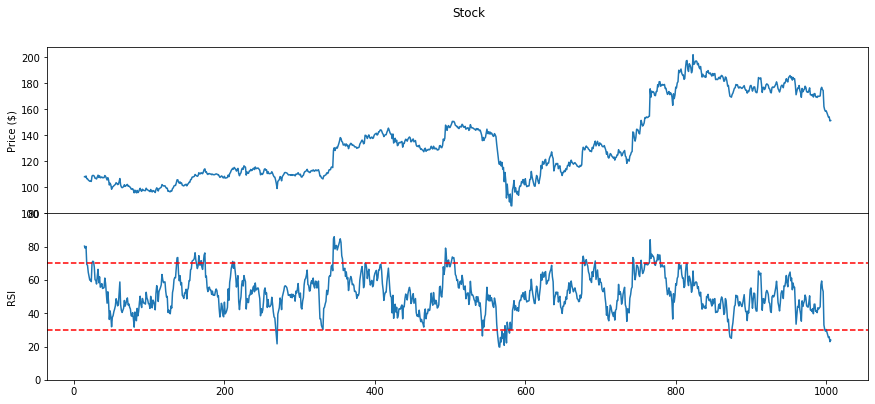

In [37]:

print(f"RSI: {ticker.iloc[-1,-1].round(2)}") 

fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('Stock')

ticker['Close'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
ticker['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--')
ax2.axhline(70, color='r', linestyle='--')
ax2.set_ylabel('RSI')
fig.set_size_inches(15, 7)
plt.subplots_adjust(left=0.11, bottom=0.24, right=0.87, top=0.90, wspace=0.2, hspace=0)
plt.show()